* Start with maps in projections of maps with bqplot -> show world with different projections
* Mention that only a few maps in bqplot, where can we get more info?
* Now we'll talk about a few different methods - geopandas, cartopy & ipyleaflet
* Interactive chloropeth plots with bqplot

In [3]:
# import our usual things
%matplotlib inline
import cartopy
import pandas as pd
import matplotlib.pyplot as plt
import geopandas 
import ipyleaflet
import numpy as np
import bqplot

# Maps in bqplot

Let's start with a few simple bqplots.

Let's check out a few other projections for world maps.

In [4]:
# scales
sc_geo = bqplot.Mercator() # not a great projection! 
# "axis"
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it all together in afigure
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

But also an issue:

In [5]:
# scales
sc_geo = bqplot.Gnomonic() # not a great projection! 
# "axis"
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it all together in afigure
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

Let's zoom in on where we are: the US

In [6]:
# scales
sc_geo = bqplot.AlbersUSA() # a projection from the globe (sphere) onto a plane (US centric)

# "axis" - in this case its a set of outlines
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# marks
states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo})

# put it all together in afigure
fig = bqplot.Figure(marks=[states_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

`bqplot` is nice because there are features we can display interactively, like info available in tooltips:

In [7]:
# scales
sc_geo = bqplot.AlbersUSA() # a projection from the globe (sphere) onto a plane (US centric)

# "axis" - in this case its a set of outlines
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# hover tooltip
def_tt = bqplot.Tooltip(fields=['id', 'name'])

# marks
states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo}, tooltip=def_tt)

# add in interactivity
states_map.interactions = {'click': 'select', 'hover': 'tooltip'}

# put it all together in afigure
fig = bqplot.Figure(marks=[states_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

Let's check out which maps we have available to us:

In [8]:
!ls ~/opt/anaconda3/pkgs/bqplot-0.12.2-py_0/site-packages/bqplot/map_data

EuropeMap.json     USCountiesMap.json USStatesMap.json   WorldMap.json


So, there is not a ton of map data in there, how do we access other kinds of maps and map data?  Let's check out a few other things.

# Geopandas

Where can we get data?  There are a few that are "stored" in geopandas:

In [9]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

Not many, but we plot the NYC boroughs very easy:

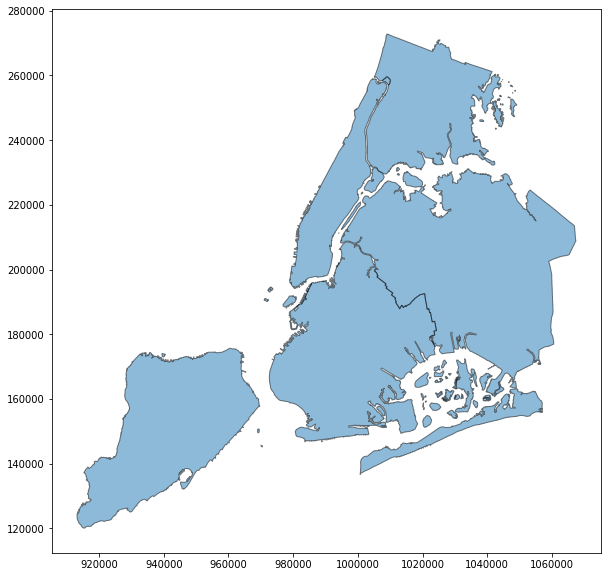

In [10]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

We live in a pretty cool city, that actually has a lot of openly accessible datasets here:

https://gis-cityofchampaign.opendata.arcgis.com/

Specifically, you can find lots of data here: https://gis-cityofchampaign.opendata.arcgis.com/search?collection=Dataset

We have a really nice interface that we can check out this data easily online.  Let's check out a map of the city council districts: https://gis-cityofchampaign.opendata.arcgis.com/datasets/city-council-districts

There is a nice visualization at the top that actually plots for us a lot of useful things!  Let's see how we can access this dataset and make some plots ourselves, by going to `APIs` $\rightarrow$ `GeoJSON`.

Let's grab: https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson

This is showing the city council districts -- i.e. areas of Champaign that are seperated by representation on the city council.

In [11]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

Like with any pandas dataframe, we can take a look at things:

In [12]:
gdf_councils.head()

,OBJECTID_1,District,Council_me,ShapeSTArea,ShapeSTLength,geometry
0,806,5,Vanna Pianfetti,1.807583e+08,210102.769771,"POLYGON ((-88.31441 40.11699, -88.31454 40.116..."
1,807,3,Angie Brix,2.006700e+08,145422.313340,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
2,808,1,Clarissa Nickerson Fourman,1.078965e+08,83420.727972,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
3,809,4,Greg Stock,1.049800e+08,77363.321725,"POLYGON ((-88.26890 40.12733, -88.27076 40.127..."
4,810,2,Alicia Beck,5.163467e+07,62219.738398,"POLYGON ((-88.23537 40.10798, -88.23537 40.107..."


In this case, `describe` probably won't help us, but we do have this available to us:

In [13]:
gdf_councils.describe()

,OBJECTID_1,ShapeSTArea,ShapeSTLength
count,5.000000,5.000000e+00,5.000000
mean,808.000000,1.291879e+08,115705.774241
std,1.581139,6.087498e+07,61577.368750
min,806.000000,5.163467e+07,62219.738398
25%,807.000000,1.049800e+08,77363.321725
50%,808.000000,1.078965e+08,83420.727972
75%,809.000000,1.807583e+08,145422.313340
max,810.000000,2.006700e+08,210102.769771


We can also make quick plots:

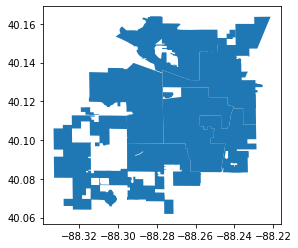

In [14]:
gdf_councils.plot()

We can make fancier plots with matplotlib:

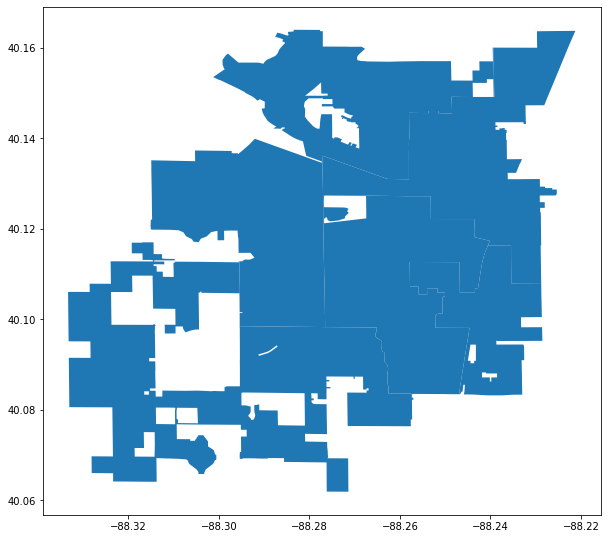

In [15]:
fig, ax = plt.subplots(figsize=(10,10))

gdf_councils.plot(ax=ax)

plt.show()

There are also a few geo-specific functions in there.  For example, we can plot out boundaries of regions:

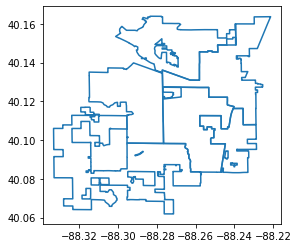

In [16]:
gdf_councils.boundary.plot()

We can get the bounding boxes for each council district:

In [17]:
gdf_councils.bounds

,minx,miny,maxx,maxy
0,-88.333303,40.061894,-88.257012,40.116995
1,-88.315071,40.098268,-88.239120,40.163956
2,-88.277158,40.107938,-88.221225,40.163721
3,-88.276971,40.083257,-88.240119,40.127432
4,-88.257818,40.083182,-88.228505,40.116346


We can also find the centers of each of each specific shape:

In [18]:
gdf_councils.centroid

0    POINT (-88.30001 40.08750)
1    POINT (-88.28231 40.13389)
2    POINT (-88.24309 40.13570)
3    POINT (-88.25983 40.10719)
4    POINT (-88.24095 40.10021)
dtype: geometry

There is also information about the coordinate reference system:

In [19]:
gdf_councils.crs

{'init': 'epsg:4326'}

This is a specific projection & coordinate system:

https://spatialreference.org/ref/epsg/wgs-84/

https://epsg.io/4326

We can use geopandas to overplot data as well.  Let's also overlay the properties that the city owns: https://gis-cityofchampaign.opendata.arcgis.com/datasets/city-owned-properties

In [20]:
gdf_props = geopandas.read_file('https://opendata.arcgis.com/datasets/3ecbc7baf1a44110a98f6d4420432000_2.geojson')

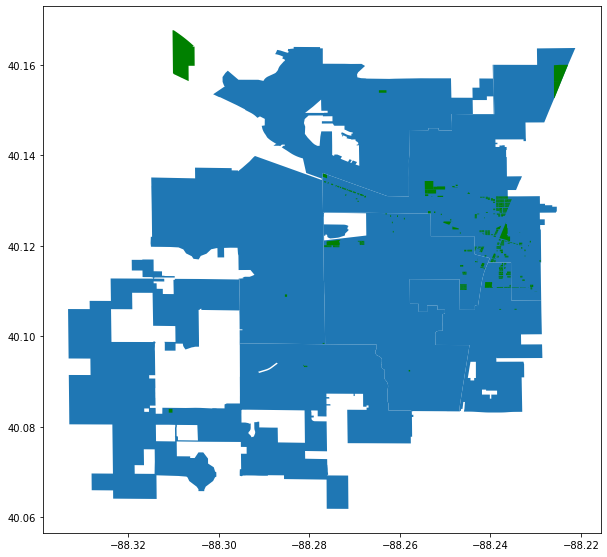

In [21]:
fig, ax = plt.subplots(figsize=(10,10))

gdf_councils.plot(ax=ax)

gdf_props.plot(ax=ax, color='green')

plt.show()

We can move to our area:

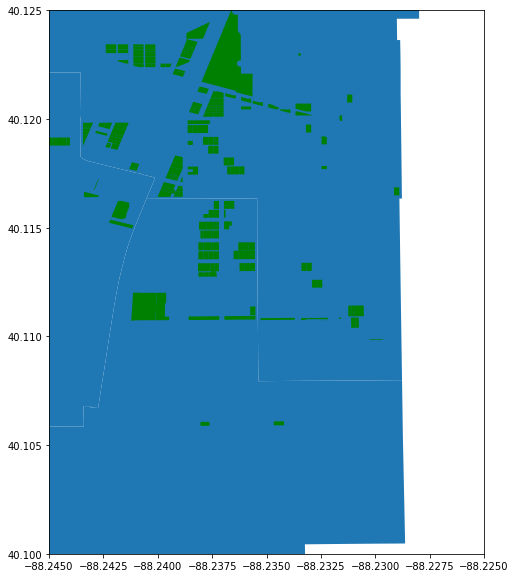

In [22]:
fig, ax = plt.subplots(figsize=(10,10))

gdf_councils.plot(ax=ax)

gdf_props.plot(ax=ax, color='green')

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

plt.show()

### Extra: apartments & building types too

This will do a bit of data manipulation to be able to plot apartments with different color schemes.

In [23]:
gdf_apts = geopandas.read_file('https://opendata.arcgis.com/datasets/64154052c5a040e287bae1583d727825_8.geojson')

Quick look:

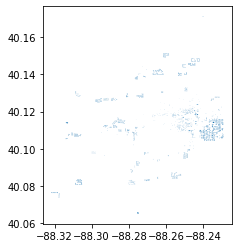

In [24]:
gdf_apts.plot()

What can we color by?

In [25]:
gdf_apts.head()

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Last_Date,Comments,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,ShapeSTArea,ShapeSTLength,geometry
0,1,2009 Moreland Blvd,412001126038,36,3,0.0,2009 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,2007-10-29T00:00:00,,,Yes,Yes,None,Yes,19657.997437,929.167804,"POLYGON ((-88.25315 40.14017, -88.25315 40.140..."
1,2,2011 Moreland Blvd,412001126038,36,3,1.0,2011 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,2007-10-29T00:00:00,,,Yes,Yes,None,Yes,19735.512329,950.194217,"POLYGON ((-88.25260 40.14057, -88.25256 40.140..."
2,3,2007 Moreland Blvd,412001126038,24,3,2.0,2007 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,2007-10-29T00:00:00,,,Yes,Yes,None,Yes,13970.178833,678.398035,"POLYGON ((-88.25274 40.14045, -88.25274 40.140..."
3,4,2003 Moreland Blvd,412001126038,36,3,3.0,2003 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,2007-10-29T00:00:00,,,Yes,Yes,None,Yes,19739.423340,941.358477,"POLYGON ((-88.25154 40.13978, -88.25156 40.139..."
4,5,2005 Moreland Blvd,412001126038,24,3,4.0,2005 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,2007-10-29T00:00:00,,,Yes,Yes,None,Yes,13065.121582,636.744457,"POLYGON ((-88.25351 40.13934, -88.25348 40.139..."


How about by the number of Stories (floors)?

In [26]:
gdf_apts['Stories'].unique()

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', ' ', '8', None, '16', '13'], dtype=object)

Let's clean out the None's and give them a value of 0:

In [27]:
gdf_apts['Stories'][gdf_apts['Stories'].isnull()] = '0' # ignorning warnings

/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
gdf_apts['Stories'].unique()

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', ' ', '8', '0', '16', '13'], dtype=object)

It looks like we also have some "empties" - let's change those to zeros as well:

In [29]:
gdf_apts['Stories'][gdf_apts['Stories']==' '] = '0'

/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
gdf_apts['Stories'].unique()

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', '0', '8', '16', '13'], dtype=object)

Finally, let's turn these floors into numbers:

In [31]:
gdf_apts['Stories'] = pd.to_numeric(gdf_apts['Stories'], errors='coerce')

In [32]:
gdf_apts['Stories'].unique()

array([ 3,  2,  1,  5,  6,  4, 20, 24,  7,  0,  8, 16, 13])

Looks good!  We can make a quick histogram to see what floors looks like:

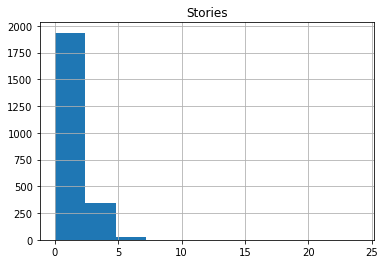

In [33]:
gdf_apts.hist(column='Stories')
plt.show()

Also, let's plot!

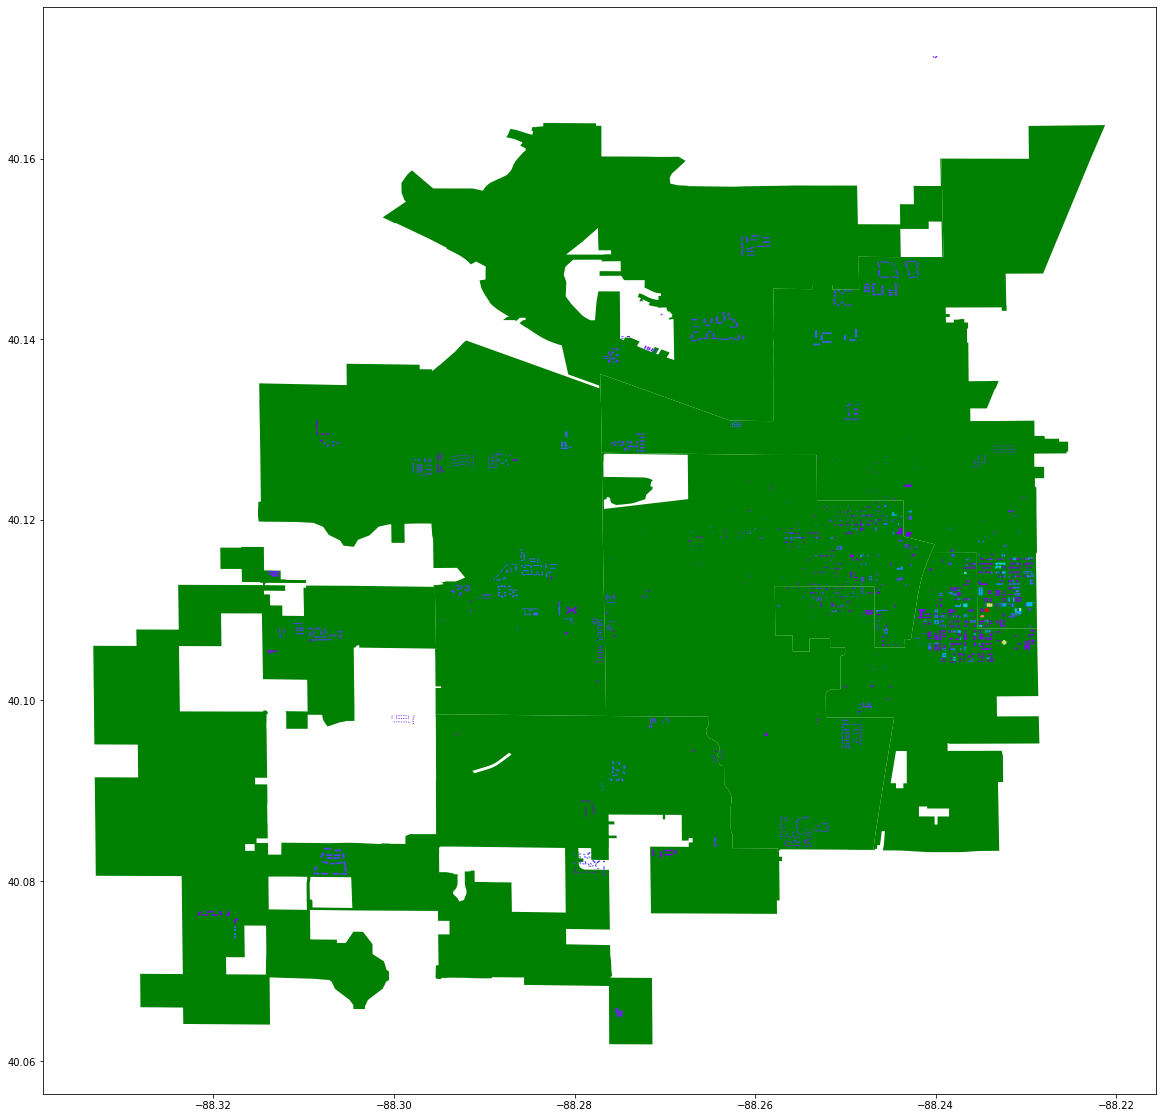

In [34]:
fig, ax = plt.subplots(figsize=(20,20))
gdf_councils.plot(ax=ax, color="green")
gdf_apts.plot(column='Stories', ax=ax, cmap='rainbow')

#ax.set_xlim(-88.35, -88.2)
#ax.set_ylim(40, 40.2)
plt.show()

Zoomed in:

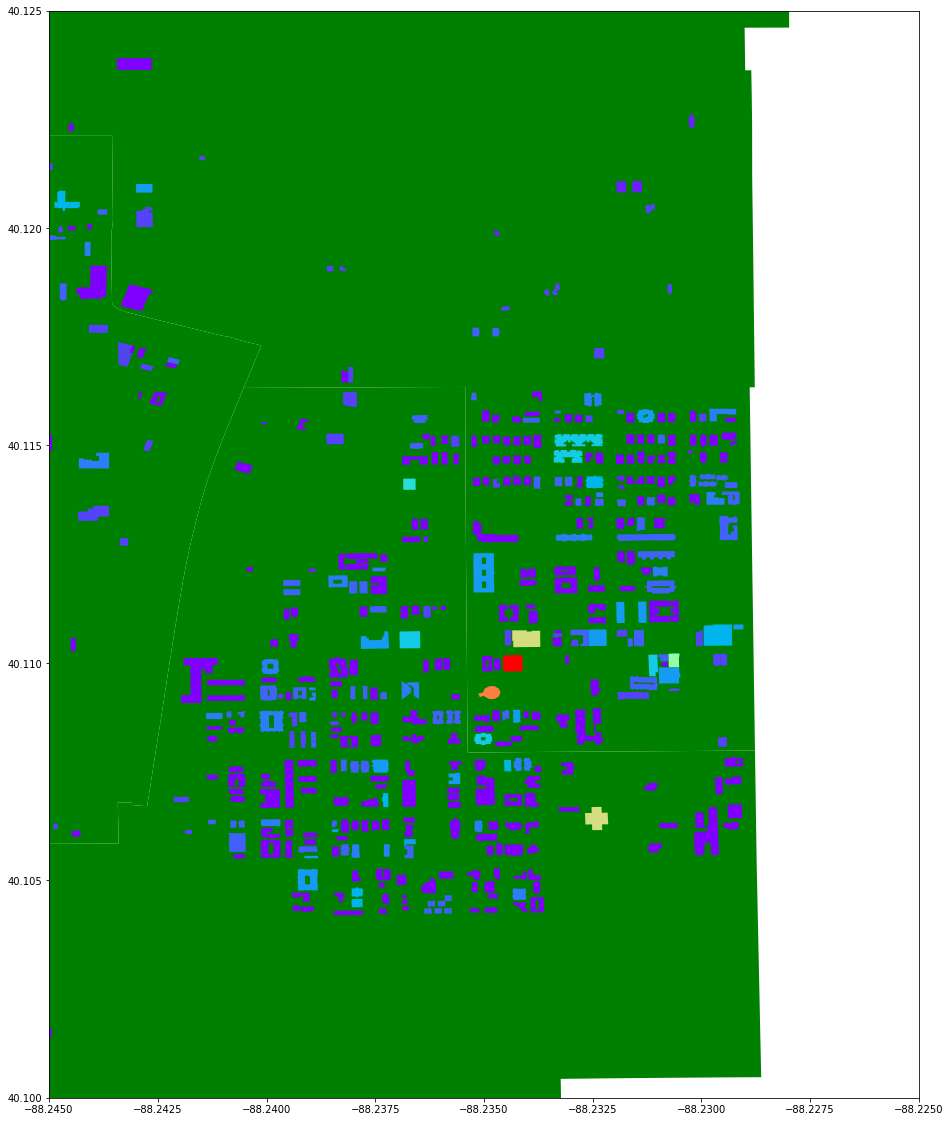

In [35]:
fig, ax = plt.subplots(figsize=(20,20))
gdf_councils.plot(ax=ax, color="green")
gdf_apts.plot(column='Stories', ax=ax, cmap='rainbow')

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

plt.show()

In [36]:
gdf_apts['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', None, 'Other'],
      dtype=object)

Got to clean again:

In [37]:
gdf_apts['Building_Type'][gdf_apts['Building_Type'].isnull()] = 'Not specified'

/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
gdf_apts['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', 'Not specified',
       'Other'], dtype=object)

Let's plot with a legend!  

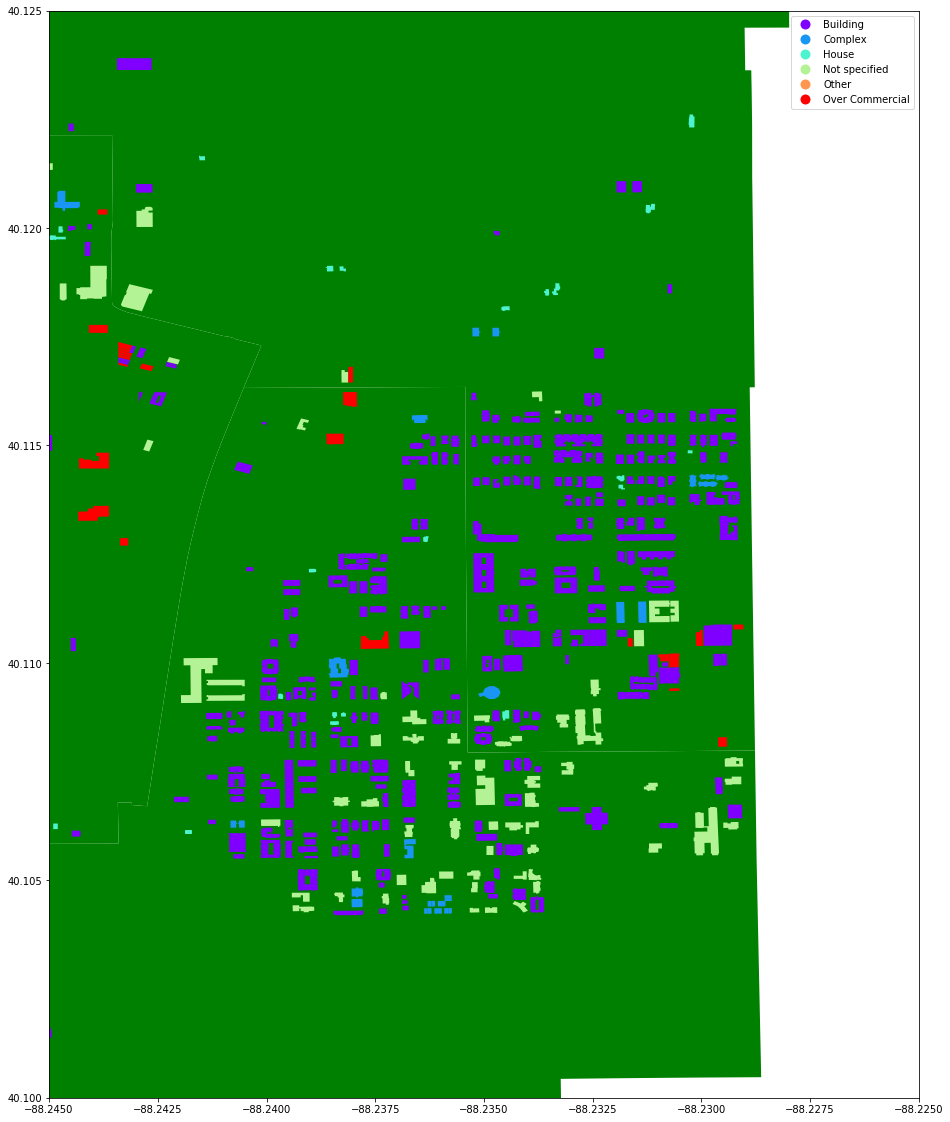

In [39]:
fig, ax = plt.subplots(figsize=(20,20))
gdf_councils.plot(ax=ax, color="green")
gdf_apts.plot(column='Building_Type', ax=ax, cmap='rainbow', categorical=True, legend=True)

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)
plt.show()

## Public data with geopandas

Is a bit hard to find, but you can, with a good bit of looking around, find it: https://datagateway.nrcs.usda.gov/

Which can lead you to places like: https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html

Let's grab the state boundaries:

In [40]:
gdf_states = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2019/STATE/tl_2019_us_state.zip')

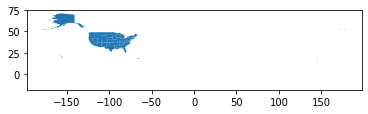

In [41]:
gdf_states.plot()

Let's zoom in to the US and take a look:

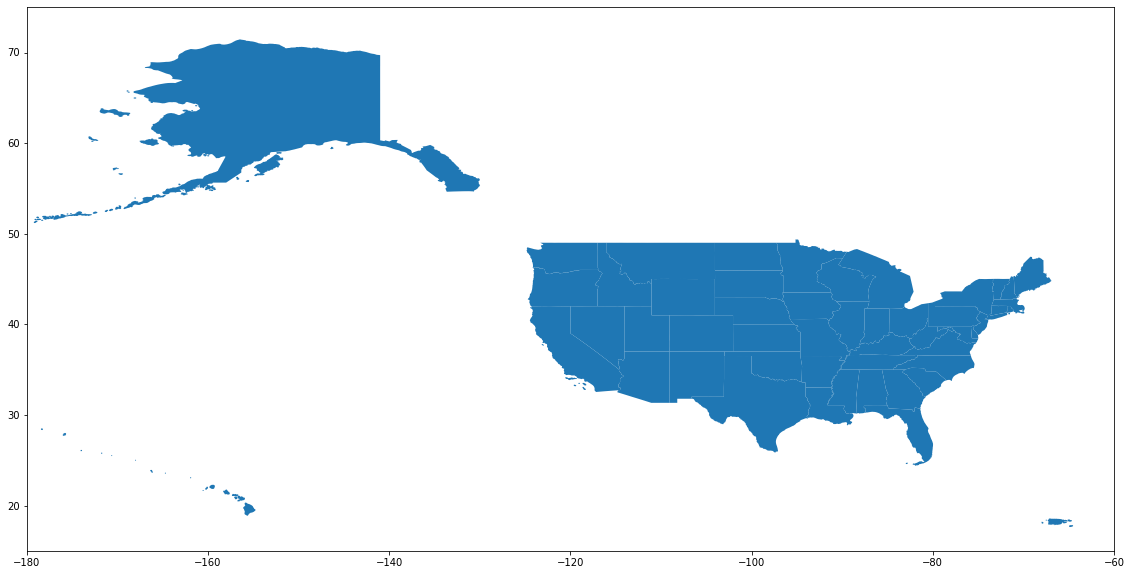

In [42]:
fig, ax = plt.subplots(figsize=(20,10))

gdf_states.plot(ax=ax)

ax.set_xlim(-180,-60)
ax.set_ylim(15, 75)

plt.show()

What other information can we grab?  More digging can lead to:

Which can lead you to: https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2019&layergroup=American+Indian+Area+Geography

You can download the file:

In [43]:
gdf_na = geopandas.read_file('/Users/jillnaiman/Downloads/tl_2019_us_aiannh/tl_2019_us_aiannh.shp')

Or we can ping directly as we did before.

In [44]:
gdf_na.head()

,AIANNHCE,AIANNHNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,COMPTYP,AIANNHR,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,2320,02419022,2320R,Mohegan,Mohegan Reservation,86,D8,R,F,G2101,A,1767260,0,+41.4900915,-072.0940543,"MULTIPOLYGON (((-72.08912 41.48040, -72.08900 ..."
1,9100,01930930,9100R,Golden Hill Paugussett,Golden Hill Paugussett (state) Reservation,86,D4,R,S,G2101,A,399343,0,+41.5521875,-072.2680204,"MULTIPOLYGON (((-72.26917 41.55472, -72.26774 ..."
2,4110,02419484,4110R,Table Mountain,Table Mountain Rancheria,85,D2,R,F,G2101,A,551202,0,+36.9848914,-119.6359563,"POLYGON ((-119.64092 36.98425, -119.64081 36.9..."
3,1380,01666180,1380R,Greenville,Greenville Rancheria,85,D2,R,F,G2101,A,284692,0,+40.1487839,-120.8933989,"POLYGON ((-120.89737 40.15100, -120.89733 40.1..."
4,1110,00806894,1110R,Flathead,Flathead Reservation,86,D2,R,F,G2101,A,5013467042,316267878,+47.4967703,-114.2842791,"POLYGON ((-114.85121 47.88721, -114.81989 47.8..."


We can see where Native American land's are on the US:

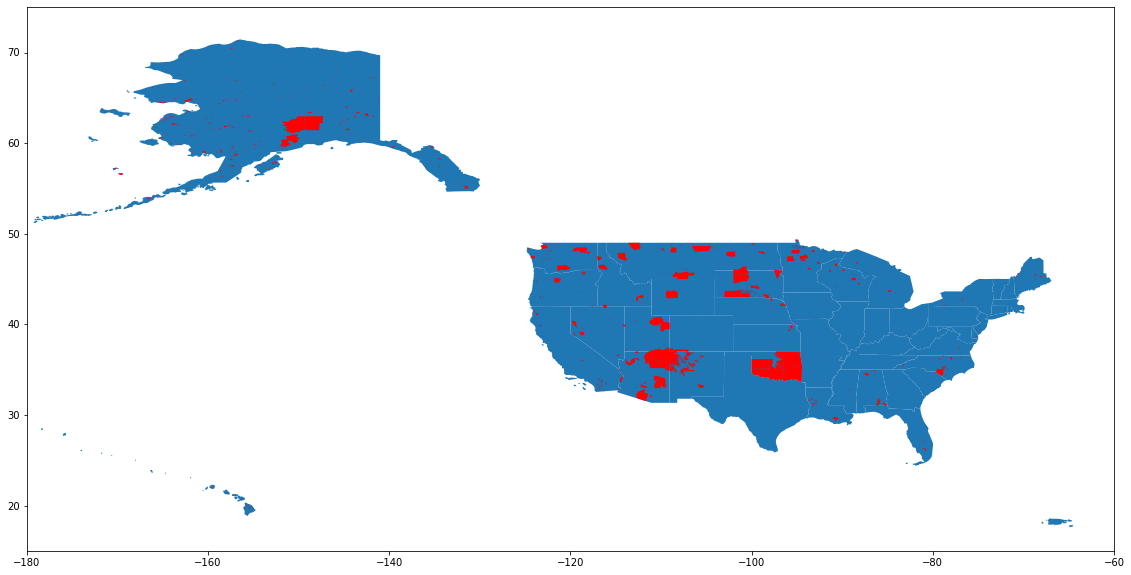

In [45]:
fig, ax = plt.subplots(figsize=(20,10))

gdf_states.plot(ax=ax)
gdf_na.plot(ax=ax, color='red')

ax.set_xlim(-180,-60)
ax.set_ylim(15, 75)

plt.show()

By type:

In [46]:
gdf_na['NAMELSAD'].unique()

array(['Mohegan Reservation',
       'Golden Hill Paugussett (state) Reservation',
       'Table Mountain Rancheria', 'Greenville Rancheria',
       'Flathead Reservation', 'Bishop Reservation',
       'Fallon Paiute-Shoshone Reservation', 'Walker River Reservation',
       'Los Coyotes Reservation', 'Manzanita Reservation',
       'Mesa Grande Reservation', 'Pala Reservation',
       'Isabella Reservation', 'Mattaponi (state) Reservation',
       'Roaring Creek Rancheria', 'Pueblo of Pojoaque',
       'Rosebud Indian Reservation', 'Woodfords Community',
       'Spokane Reservation', 'Chitimacha Reservation',
       'Coos, Lower Umpqua, and Siuslaw Reservation',
       'Pascua Pueblo Yaqui Reservation', 'Berry Creek Rancheria',
       'Enterprise Rancheria', 'Shakopee Mdewakanton Sioux Community',
       'Santa Rosa Rancheria', "L'Anse Reservation",
       'Paucatuck Eastern Pequot (state) Reservation',
       'Mississippi Choctaw Reservation', 'Duck Valley Reservation',
       'Southe

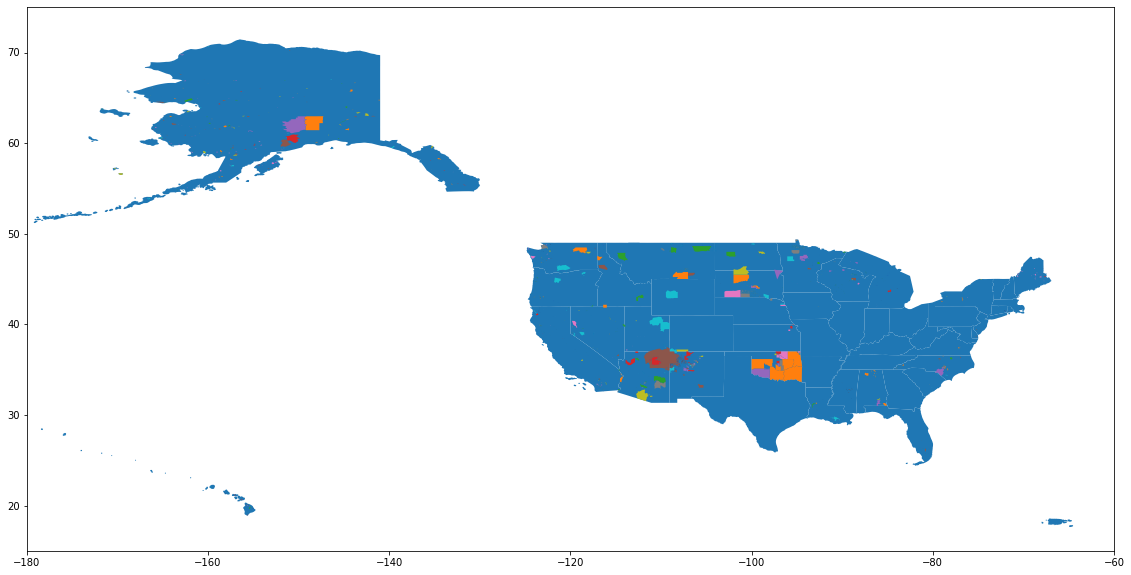

In [47]:
fig, ax = plt.subplots(figsize=(20,10))

gdf_states.plot(ax=ax)
gdf_na.plot(column='NAMELSAD', ax=ax)

ax.set_xlim(-180,-60)
ax.set_ylim(15, 75)

plt.show()

### Plot waterways

One more!

In [48]:
gdf_water = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2019/AREAWATER/tl_2019_01001_areawater.zip')

In [49]:
gdf_water.head()

,ANSICODE,HYDROID,FULLNAME,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,None,110585123145,None,H2030,0,6799347,+32.4053710,-86.7882530,"POLYGON ((-86.78825 32.40537, -86.78823 32.405..."
1,None,110585123223,None,H2030,0,59480,+32.4038478,-86.6020994,"POLYGON ((-86.60363 32.40047, -86.60359 32.400..."
2,None,110585123208,None,H2030,0,42919,+32.3474700,-86.7947210,"POLYGON ((-86.79583 32.34779, -86.79579 32.347..."
3,None,110585123141,None,H2030,0,30450,+32.3828171,-86.5865927,"POLYGON ((-86.58775 32.38230, -86.58771 32.382..."
4,None,110585123178,None,H2030,0,60701,+32.4713894,-86.7651146,"POLYGON ((-86.76657 32.46948, -86.76650 32.469..."


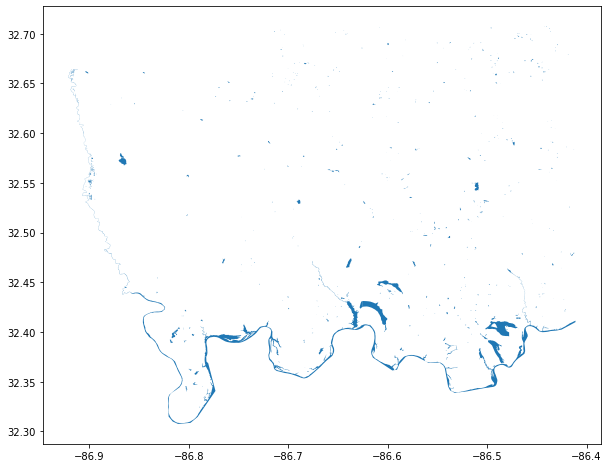

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_water.plot(ax=ax)
plt.show()
# we can see this is showing data for a small subset of the US

Where are these waterways?

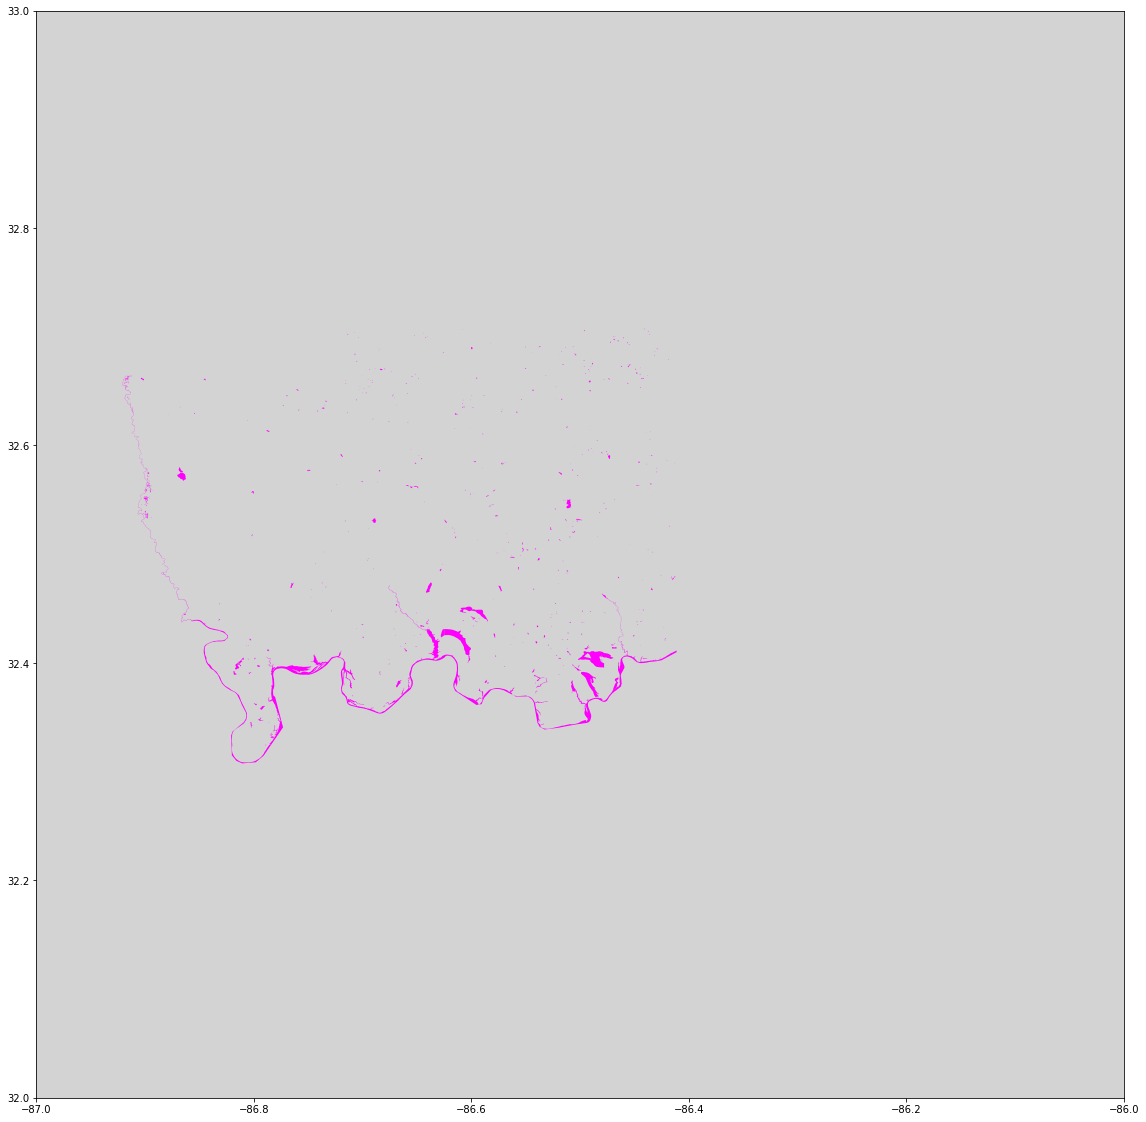

In [51]:
fig, ax = plt.subplots(figsize=(20,20))
gdf_states.plot(ax=ax, color='lightgray')
gdf_water.plot(ax=ax, color='magenta')

ax.set_xlim(-87, -86)
ax.set_ylim(32,33)

plt.show()

Let's zoom out a good deal:

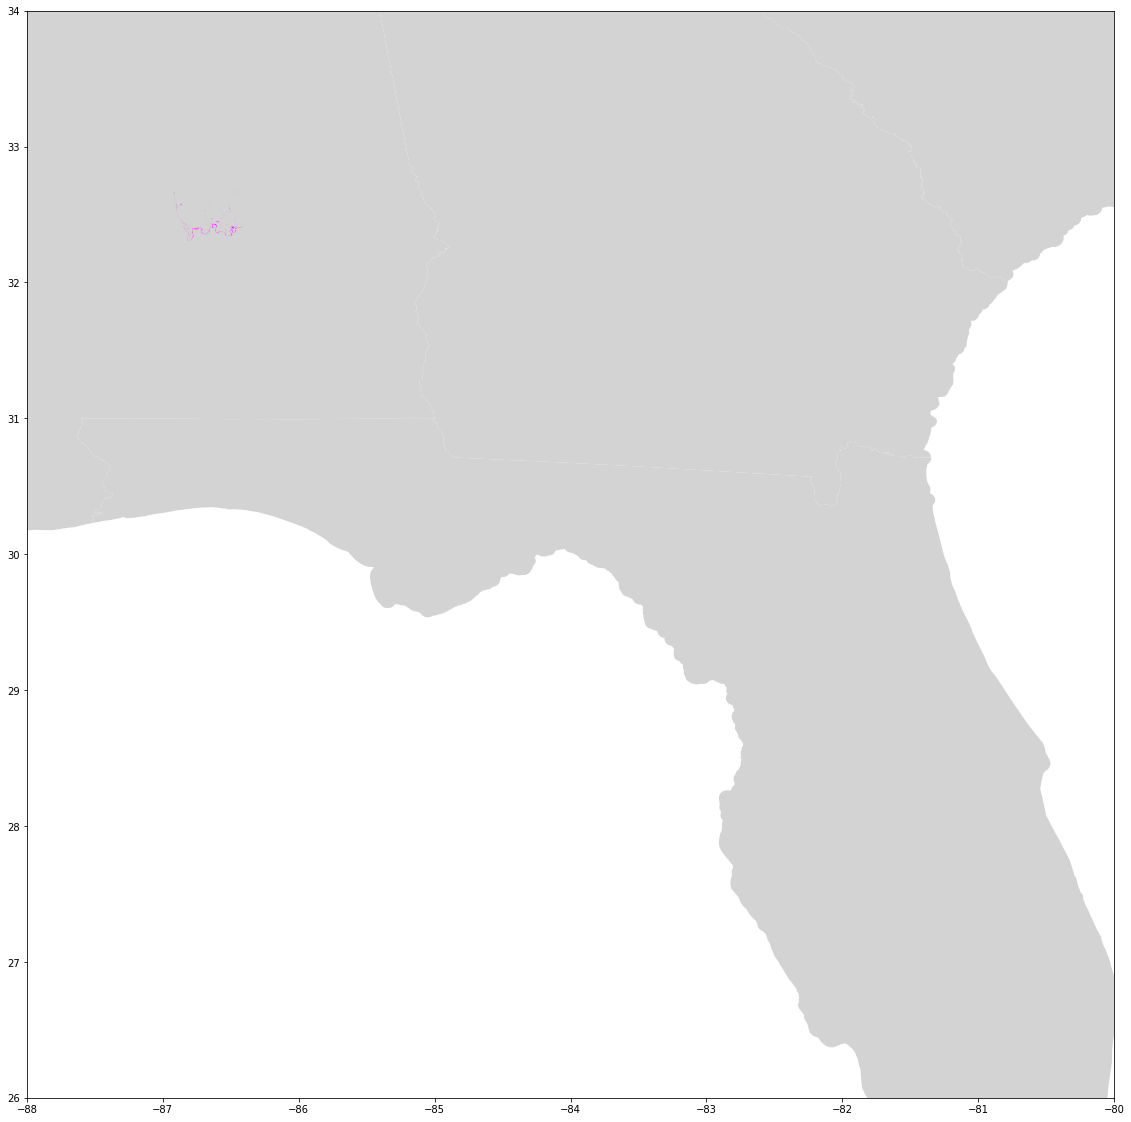

In [52]:
fig, ax = plt.subplots(figsize=(20,20))
gdf_states.plot(ax=ax, color='lightgray')
gdf_water.plot(ax=ax, color='magenta')

ax.set_xlim(-88, -80)
ax.set_ylim(26, 34)

plt.show()

# Using GeoJSON data in bqplot

We can use `requests` to ping websites for GeoJSON files directly.

In [53]:
import requests

In [54]:
shape_file_url = 'https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson'
gdata = requests.get(shape_file_url).json()

In [55]:
gdata

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID_1': 806,
    'District': '5',
    'Council_me': 'Vanna Pianfetti',
    'ShapeSTArea': 180758329.27270508,
    'ShapeSTLength': 210102.7697710323},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-88.31441072927392, 40.11698590433241],
      [-88.31453605144318, 40.11698635523766],
      [-88.31455540134952, 40.116986425022624],
      [-88.31473228495142, 40.116987061486576],
      [-88.31539756632594, 40.11698945220445],
      [-88.31620711161898, 40.11699235676648],
      [-88.31689954984104, 40.11699483563354],
      [-88.31689826989421, 40.116912488666884],
      [-88.31923827309942, 40.11691392195105],
      [-88.31921198210522, 40.11458861069375],
      [-88.31921167223642, 40.11456115781356],
      [-88.31821067635452, 40.11455754782752],
      [-88.31815342048867, 40.11455734039906],
      [-88.3180423058716, 40.11455692590576],
      [-88.31791742451107, 40.11455646084063],
    

Let's use our champaign county map in bqplot maps.  First, let's zoom into IL:

In [56]:
sc_geo = bqplot.Mercator(scale_factor = 10000, center=(-88.2434, 40.15)) # long/lat, scale factor is default of 190

state_data = bqplot.topo_load('map_data/USStatesMap.json')

def_tt = bqplot.Tooltip(fields=['id', 'name'])

states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo}, tooltip=def_tt)
states_map.interactions = {'click': 'select', 'hover': 'tooltip'}

fig=bqplot.Figure(marks=[states_map], title='US States Map Example',
                  fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

We can use this scale to plot the Champaign county map:

In [57]:
sc_geo = bqplot.Mercator(scale_factor = 10000, center=(-88.2434, 40.15)) # long/lat, scale factor is default of 190

mymap = bqplot.Map(map_data=gdata, scales={'projection':sc_geo})

fig=bqplot.Figure(marks=[mymap], title='Map Example',
                  fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

That's still pretty far out, let's zoom in!

In [58]:
sc_geo = bqplot.Mercator(scale_factor = 200000, center=(-88.2434, 40.15)) # long/lat, scale factor is default of 190

mymap = bqplot.Map(map_data=gdata, scales={'projection':sc_geo})

fig=bqplot.Figure(marks=[mymap], title='Map Example',
                  fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [60]:
sc_geo = bqplot.Mercator(scale_factor = 200000, center=(-88.2434, 40.15)) # long/lat, scale factor is default of 190

def_tt = bqplot.Tooltip(fields=['District', 'Council_me'])

mymap = bqplot.Map(map_data=gdata, scales={'projection':sc_geo}, tooltip=def_tt)

mymap.colors = {'default_color':"blue"}

mymap.interactions = {'click': 'select', 'hover': 'tooltip'}

fig=bqplot.Figure(marks=[mymap], title='Map Example',
                  fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(colors={'default_color': 'blue'},…

How do I find out what is supported in my tooltip?

In [61]:
state_data.keys()

dict_keys(['type', 'objects', 'transform', 'arcs'])

In [62]:
state_data['objects'].keys()

dict_keys(['land', 'subunits'])

In [63]:
state_data['objects']['land']

{'type': 'MultiPolygon',
 'properties': {'counties': None},
 'arcs': [[[5830,
    6026,
    6034,
    6073,
    6164,
    6179,
    6023,
    6043,
    6231,
    6416,
    6410,
    6564,
    6243,
    6565,
    6546,
    6475,
    6542,
    6784,
    6741,
    6811,
    6739,
    6870,
    6965,
    7087,
    7246,
    -7086,
    7247,
    7255,
    7256,
    7257,
    7305,
    7566,
    9399,
    7668,
    9397,
    -7836,
    9398,
    7838,
    8050,
    8017,
    8018,
    8019,
    8020,
    8021,
    8047,
    8023,
    8252,
    8247,
    8302,
    8493,
    8575,
    -8491,
    8576,
    8671,
    8807,
    8877,
    8984,
    9074,
    9116,
    9138,
    9129,
    9073,
    8960,
    8874,
    8961,
    8956,
    8957,
    9090,
    9130,
    9181,
    -9123,
    9182,
    9125,
    9177,
    9255,
    9278,
    9279,
    9280,
    9311,
    9306,
    9307,
    9308,
    9309,
    9318,
    9340,
    9347,
    9342,
    9343,
    9344,
    9345,
    9349,
    9338,
    9326

In [64]:
state_data['objects']['land'].keys()

dict_keys(['type', 'properties', 'arcs'])

In [65]:
state_data['objects']['subunits'].keys()

dict_keys(['type', 'geometries'])

In [66]:
len(state_data['objects']['subunits']['geometries'])

53

In [67]:
state_data['objects']['subunits']['geometries'][0].keys()

dict_keys(['arcs', 'type', 'id', 'properties'])

In [68]:
# the two we are interested in:
print(state_data['objects']['subunits']['geometries'][0]['id'])
print(state_data['objects']['subunits']['geometries'][0]['properties'])

53
{'name': 'Washington'}


What would be available for my council dataset?

In [69]:
gdata['features'][0]['properties'] # these are possible keys for our tooltip

{'OBJECTID_1': 806,
 'District': '5',
 'Council_me': 'Vanna Pianfetti',
 'ShapeSTArea': 180758329.27270508,
 'ShapeSTLength': 210102.7697710323}

# Super quick: ipyleaflet

In [71]:
#!pip install ipyleaflet
from ipyleaflet import *
# note: you might have to close and reopen you notebook
# to see the map

m = Map(center=(52, 10), zoom=8, basemap=basemaps.Hydda.Full)

m

Map(center=[52, 10], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

In [72]:
#!pip install ipyleaflet
from ipyleaflet import *
# note: you might have to close and reopen you notebook
# to see the map

m = Map(center=(52, 10), zoom=8, basemap=basemaps.Hydda.Full)

#(2) street maps
strata_all = basemap_to_tiles(basemaps.Strava.All)
m.add_layer(strata_all)
m

Map(center=[52, 10], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…